# DI 501 Assignment 1

### Due: April 2, Sunday by 23:59
---

### Submission and Grading Principles

* Submit your assignments to the corresponding assignment module in https://odtuclass.metu.edu.tr.

* Solutions should be submitted in a single **ipynb** file named: name_surname_a1.ipynb (e.g., “volga_sezen_a1.ipynb”).

* Late submissions will be accepted by April 5, 2023, 23:59 with a 10% per day penalty.

* Add your code to the code blocks below each part, and your commentary in the markdown blocks below them.

* **<font color=#C91515>This is an individual assignment. Please do not collaborate. You have to adhere to the academic integrity principles.</font>** 

* Provide commentary on your results wherever appropriate. Insights about data are only generated through reasoning,<br>so no matter how you get numbers, tables, or graphics, your interpretations are even more crucial to gauge your understanding.

------------

### The aim of this assignment is getting you familiar with:

* Python and Jupyter notebooks,

* Simple data cleaning,

* Descriptive statistics interpretation, and

* Visualization methods.

------------

### Metadata and Brief Info

This data was sampled from a catalog of stars observed with LAMOST as part of the LEAGUE sky survey. 

Each row corresponds to a single star, and the following attributes are given for each:

| Variable Name    | Explanation                                                                              |
|----------|--------------------------------------------------------------------------------------------------|
| obsid    | Unique identifier number for the star                                                            |
| obsdate  | Observation date       (dd/mm/yyyy)                                                                          |
| ra       | Right ascension, astronomical coordinate analogous to the x direction (Degree)                            |
| dec      | Declination, astronomical coordinate analogous to the y direction (Degree)                                |
| subclass | Luminosity* (first lowercase letters if exists) and Spectral** (capital letter and digit) classes           |
| mag5     | Measured brightness of the star in the infrared (Magnitude)                                                 |
| z        | Estimated redshift amount (Fraction change)                                                                                |
| z_err    | Window of uncertainty for redshift                                                                |
| rv       | Radial velocity (along line of sight) of the star estimated by the doppler effect (Km/s)                                   |
| rv_err   | Window of uncertainty for relative velocity                                                      |
| logg     | Estimated surface gravity in logarithmic scale (Dex, $10^x$, compared to the Sun)                                                   |
| logg_err | Window of uncertainty for surface gravity                                                        |
| teff     | Estimated effective temperature of the surface (Kelvin)                                                  |
| teff_err | Window of uncertainty for surface temperature                                                    |
| feh      | Estimated element composition for elements heavier than hydrogen (Dex, $10^x$, compared to the Sun)                                |
| feh_err  | Window of uncertainty for heavier element composition                                            |

(*) Luminosity classes are indicated by designations g for giant, d for dwarf (like our Sun) and sd for subdwarf. <br>
(**) Spectral classes are made up of the main class (the letter) and the digit portion allows for smooth transition. (A star right in-between A and F is labeled A5.)

------------

### 1) Environment setup
Import numpy, pandas, matplotlib and seaborn, along with other libraries you may utilize.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

from scipy import stats
import statsmodels.api as sm 

### 2) Initial inspection (5p)

Load the data given and show how many observations and features exist.<br>Then show the last 6 rows.

In [2]:
stars = pd.read_csv("C:\\Users\\ipeks\\Desktop\\Bilimsel Hazırlık 2. Dönem\\DI501 - Intro to DI\\assignment1\\stars.csv")
stars.tail(6)


,Unnamed: 0,obsid,obsdate,ra,dec,subclass,mag5,z,z_err,rv,rv_err,logg,logg_err,teff,teff_err,feh,feh_err
10257,44601,510707035,06/01/2017,93.591097,21.700217,A1,15.337400,2.080000e-05,0.000014,6.25,4.26,4.164,0.039,11264.10,28.24,0.261,0.022
10258,34686,756612059,25/10/2019,95.578421,10.893602,F9,-999.000000,1.293400e-04,0.000111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10259,56485,401107221,05/01/2016,171.509245,3.062943,K3,17.208401,-2.300000e-07,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10260,92465,279603002,13/12/2014,59.505910,27.856340,K5,-999.000000,4.080000e-05,0.000015,12.22,4.56,4.698,0.059,4440.80,41.01,-0.451,0.041
10261,37738,185316092,30/11/2013,54.049777,47.235935,F7,-999.000000,2.300000e-05,0.000020,6.89,5.91,4.013,0.069,6207.88,50.03,0.015,0.049
10262,79250,731309015,02/03/2019,211.841344,7.706112,dM2,-999.000000,-7.390000e-05,0.000051,NaN,NaN,4.558,0.260,3571.43,124.92,NaN,NaN
10263,64604,18404028,19/12/2011,82.189233,29.905013,K4,19.043800,5.940000e-05,0.000030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10264,66485,566908058,28/04/2017,256.303457,38.712417,A1,18.839800,-4.785600e-04,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10265,71869,602712112,15/11/2017,124.250463,26.922747,G6,15.496700,-1.600000e-06,0.000020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10266,83639,487809061,04/12/2016,82.593356,4.698963,K1,-999.000000,-1.108300e-04,0.000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3) Faulty values (5p)

Some of the measurements and estimations are not labeled as missing but still look dubious.<br>Use descriptive statistics to quickly find these hidden missing values and recode them as NaNs.

In [3]:
stars.describe()

,Unnamed: 0,obsid,ra,dec,mag5,z,z_err,rv,rv_err,logg,logg_err,teff,teff_err,feh,feh_err
count,10273.000000,1.027300e+04,10273.000000,10273.000000,10273.000000,10273.000000,10273.000000,6775.000000,6775.000000,7515.000000,7515.000000,7515.000000,7515.000000,6775.000000,6775.000000
mean,51563.258542,3.490311e+08,139.872537,26.307244,-558.610053,-1.946689,-4.859603,-7.814066,5.403108,4.098412,0.096078,5446.203222,59.008512,-0.249618,0.054641
std,29630.350916,2.217785e+08,90.748314,16.761320,712.383388,139.508857,220.552425,47.210103,2.333900,0.719558,0.073747,1084.422310,39.409242,0.349996,0.042904
min,0.000000,2.022160e+05,0.097141,-9.155958,-9999.000000,-9999.000000,-9999.000000,-372.520000,0.740000,0.236000,0.005000,3000.000000,4.040000,-2.411000,0.002000
25%,26106.000000,1.658022e+08,73.277271,13.438892,-999.000000,-0.000114,0.000011,-31.520000,3.910000,3.981000,0.043000,4791.715000,30.585000,-0.430000,0.025000
50%,51546.000000,3.186010e+08,116.792870,26.615097,-999.000000,-0.000024,0.000016,-7.010000,4.880000,4.229000,0.068000,5510.500000,46.480000,-0.207000,0.039000
75%,77405.000000,5.075092e+08,196.993304,39.305333,15.359400,0.000063,0.000022,17.825000,6.320000,4.545000,0.135000,6025.285000,79.110000,-0.021000,0.075000
max,102715.000000,8.239081e+08,359.959278,87.459423,21.045300,0.004157,59.497100,354.830000,34.670000,5.500000,1.112000,12778.800000,657.300000,0.971000,0.729000


In [4]:
stars.z[stars.z == -9999] = np.nan
stars.z_err[stars.z_err == -9999] = np.nan
stars.mag5[(stars.mag5 == -9999)] = np.nan
stars.mag5[(stars.mag5 == -999)] = np.nan
stars.describe()


C:\Users\ipeks\AppData\Local\Temp\ipykernel_19944\2425263640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stars.z[stars.z == -9999] = np.nan
C:\Users\ipeks\AppData\Local\Temp\ipykernel_19944\2425263640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stars.z_err[stars.z_err == -9999] = np.nan
C:\Users\ipeks\AppData\Local\Temp\ipykernel_19944\2425263640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stars.mag5[(stars.mag5

,Unnamed: 0,obsid,ra,dec,mag5,z,z_err,rv,rv_err,logg,logg_err,teff,teff_err,feh,feh_err
count,10273.000000,1.027300e+04,10273.000000,10273.000000,4715.000000,10271.000000,10268.000000,6775.000000,6775.000000,7515.000000,7515.000000,7515.000000,7515.000000,6775.000000,6775.000000
mean,51563.258542,3.490311e+08,139.872537,26.307244,15.872942,-0.000033,0.007041,-7.814066,5.403108,4.098412,0.096078,5446.203222,59.008512,-0.249618,0.054641
std,29630.350916,2.217785e+08,90.748314,16.761320,2.207515,0.000300,0.844159,47.210103,2.333900,0.719558,0.073747,1084.422310,39.409242,0.349996,0.042904
min,0.000000,2.022160e+05,0.097141,-9.155958,7.938080,-0.004136,-5.000000,-372.520000,0.740000,0.236000,0.005000,3000.000000,4.040000,-2.411000,0.002000
25%,26106.000000,1.658022e+08,73.277271,13.438892,13.976600,-0.000114,0.000011,-31.520000,3.910000,3.981000,0.043000,4791.715000,30.585000,-0.430000,0.025000
50%,51546.000000,3.186010e+08,116.792870,26.615097,15.688100,-0.000024,0.000016,-7.010000,4.880000,4.229000,0.068000,5510.500000,46.480000,-0.207000,0.039000
75%,77405.000000,5.075092e+08,196.993304,39.305333,17.607900,0.000063,0.000022,17.825000,6.320000,4.545000,0.135000,6025.285000,79.110000,-0.021000,0.075000
max,102715.000000,8.239081e+08,359.959278,87.459423,21.045300,0.004157,59.497100,354.830000,34.670000,5.500000,1.112000,12778.800000,657.300000,0.971000,0.729000


### 4) Data cleaning (15p)

* Drop rows which contain missing values in (equal to and) more than a third of their fields.

* Define a new variable called "class" that only consists of the main spectral class. (capital letter portion)

* "mag5" column corresponds to brightness observed at 963.3 nanometers, which can pass through our atmosphere.<br>This frequency is the same as the central frequency of the y band of Pan-STARSS1 telescope.<br> Rename the column to "panstarss1_y" to reflect this.

* Recode the "date" column as a DateTime object.

* Show that your methods worked by exposing each columns' data type and other information.

In [5]:
class_ = np.array([re.findall(r'[A-Z]', x) for x in stars['subclass']])
class_=np.matrix(class_)
stars["class_"] = class_

In [6]:


stars = stars.dropna(thresh=stars.shape[1]-6, axis=0)

stars.rename(columns={"mag5" : "panstarss1_y"})

stars["obsdate"] = pd.to_datetime(stars["obsdate"])

stars.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7515 entries, 1 to 10269
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  7515 non-null   int64         
 1   obsid       7515 non-null   int64         
 2   obsdate     7515 non-null   datetime64[ns]
 3   ra          7515 non-null   float64       
 4   dec         7515 non-null   float64       
 5   subclass    7515 non-null   object        
 6   mag5        3382 non-null   float64       
 7   z           7515 non-null   float64       
 8   z_err       7515 non-null   float64       
 9   rv          6775 non-null   float64       
 10  rv_err      6775 non-null   float64       
 11  logg        7515 non-null   float64       
 12  logg_err    7515 non-null   float64       
 13  teff        7515 non-null   float64       
 14  teff_err    7515 non-null   float64       
 15  feh         6775 non-null   float64       
 16  feh_err     6775 non-nu

C:\Users\ipeks\AppData\Local\Temp\ipykernel_19944\1658432702.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  stars["obsdate"] = pd.to_datetime(stars["obsdate"])


### 5) Interpreting descriptive statistics (10p)

Just by looking at descriptive statistics (and no graphs yet) of each numeric column determine whether they possess a left-skewed,<br>  right-skewed, or a symmetric distribution.

In [7]:
stars.describe()


,Unnamed: 0,obsid,ra,dec,mag5,z,z_err,rv,rv_err,logg,logg_err,teff,teff_err,feh,feh_err
count,7515.000000,7.515000e+03,7515.000000,7515.000000,3382.000000,7515.000000,7515.000000,6775.000000,6775.000000,7515.000000,7515.000000,7515.000000,7515.000000,6775.000000,6775.000000
mean,51465.177112,3.587535e+08,144.254714,26.153458,15.645607,-0.000027,-0.000514,-7.814066,5.403108,4.098412,0.096078,5446.203222,59.008512,-0.249618,0.054641
std,29471.534539,2.162104e+08,91.213018,16.476167,2.205905,0.000192,0.023067,47.210103,2.333900,0.719558,0.073747,1084.422310,39.409242,0.349996,0.042904
min,0.000000,2.022160e+05,0.097141,-9.155958,7.938080,-0.004136,-1.000000,-372.520000,0.740000,0.236000,0.005000,3000.000000,4.040000,-2.411000,0.002000
25%,26093.500000,1.836536e+08,77.692909,13.556714,13.798775,-0.000106,0.000013,-31.520000,3.910000,3.981000,0.043000,4791.715000,30.585000,-0.430000,0.025000
50%,51502.000000,3.346042e+08,123.228570,26.197034,15.304750,-0.000024,0.000016,-7.010000,4.880000,4.229000,0.068000,5510.500000,46.480000,-0.207000,0.039000
75%,76819.000000,5.246012e+08,202.901417,38.969830,17.406500,0.000058,0.000021,17.825000,6.320000,4.545000,0.135000,6025.285000,79.110000,-0.021000,0.075000
max,102715.000000,8.239081e+08,359.942254,87.459423,21.045300,0.004153,0.000300,354.830000,34.670000,5.500000,1.112000,12778.800000,657.300000,0.971000,0.729000


right-skewed : mean > median > mode  
left-skewed  : mode > median > mean 
symmetrical  : mean = median = mode
In the descriptive statistics, the median is interpretted as %50 (2nd quartile)
RA      : mean > median (144 > 123) :right skewed 
DEC     : Median is greater than the mean (26.197 >26.15), left-skewed distribution.
MAG5    : Mean is greater than the median(15.64 > 15.30), right-skewed distribution.
Z       : Mean and median are very close to each other, Symmetrical distribution.
Z_ERR   : Mean and median are very close to each other, Symmetrical distribution.
RV      : Median is greater than the mean (-7 > -7.8), left-skewed distribution.
RV_ERR  : Mean is greater than the median(5.4 > 4.88), right-skewed distribution.
LOGG    : Median is greater than the mean (4.23 > 4.09), left-skewed distribution.
LOGG_ERR: Mean is greater than the median(0.09 > 0.06), right-skewed distribution.
TEFF    : Mean is greater than the median(5446 > 5510), right-skewed distribution.
TEFF_ERR: Mean is greater than the median(59 > 46), right-skewed distribution.
FEH     : Median is greater than the mean (-0.207 > -0.249), left-skewed distribution.
FEH_ERR : Mean is greater than the median(0.05 > 0.039), right-skewed distribution.

### 6) Visualizing distributions (15p)

* Visualize the distributions of numeric variables and determine whether they are close to a gaussian distribution or not.<br>Provide additional commentary for any peculiarities you spot. (You can use subplots and loops to put multiple graphs inside the same figure.)

* For the categorical variables, use appropriate visualisations and comment on whether the sample is balanced or not.

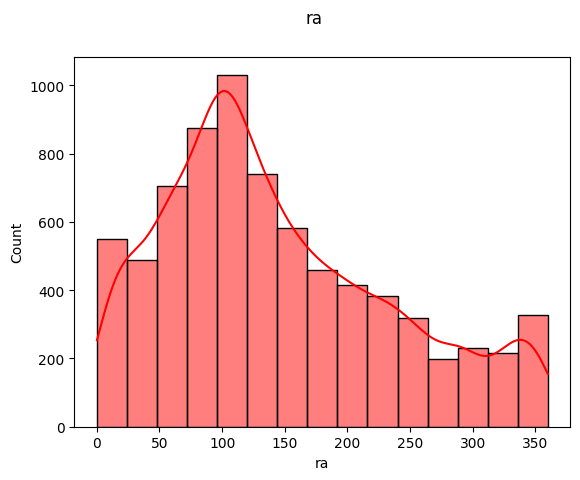

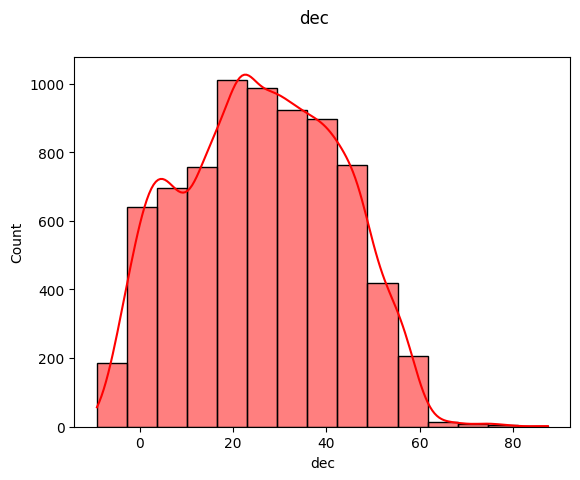

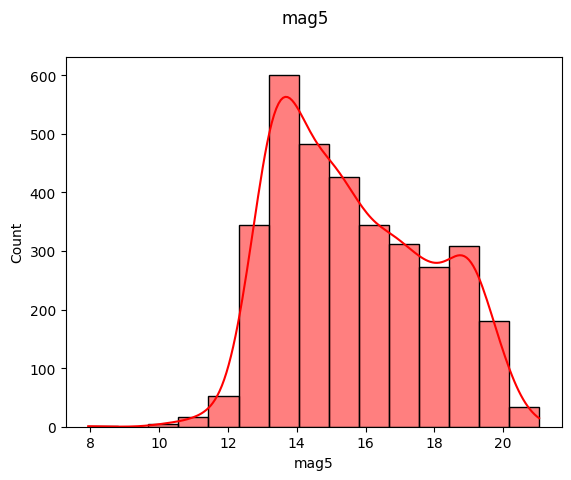

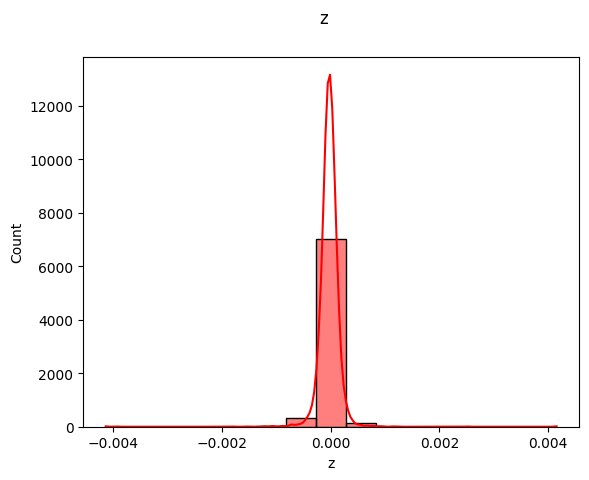

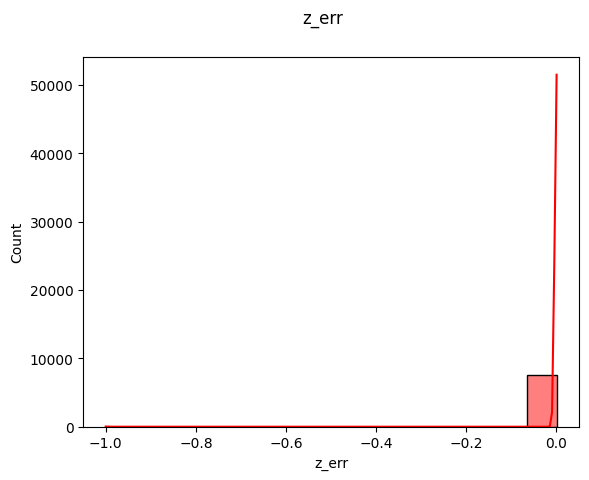

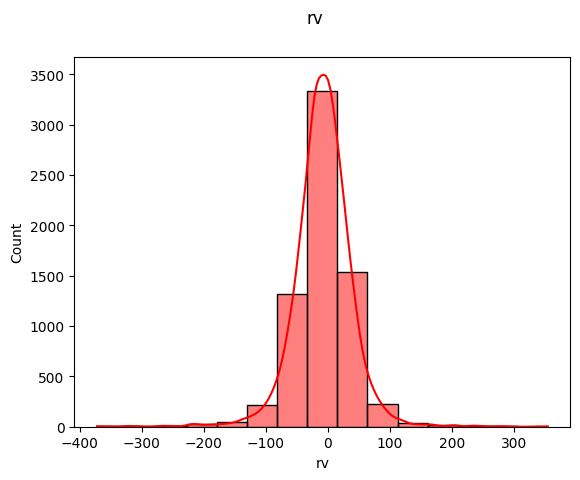

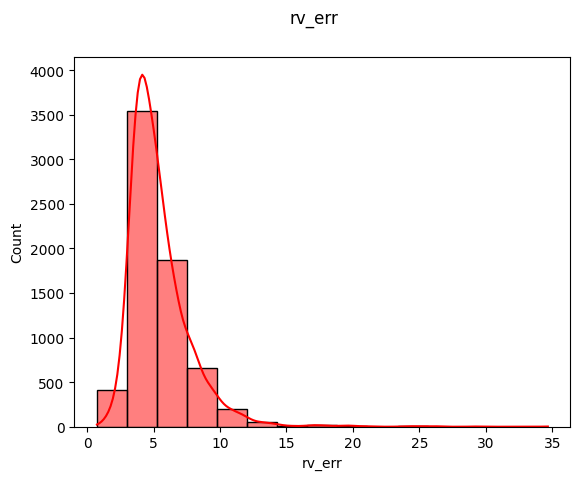

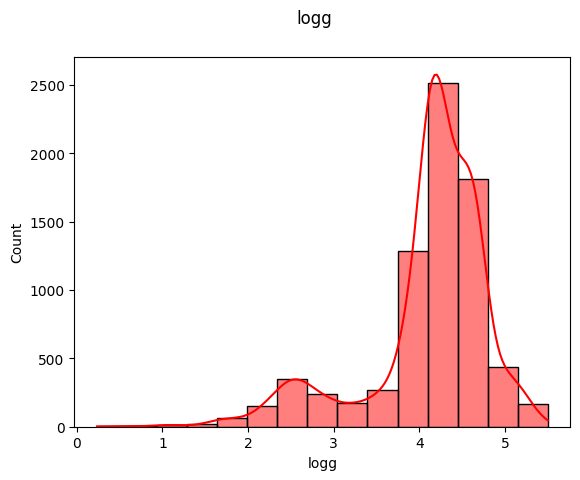

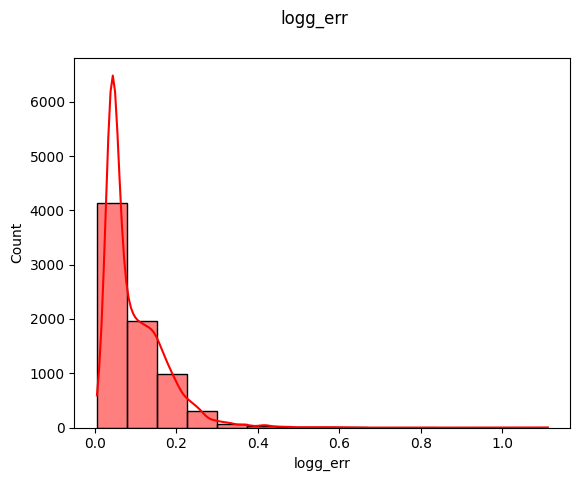

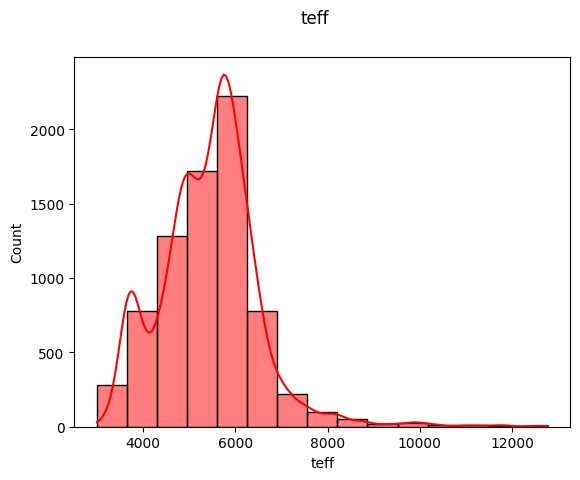

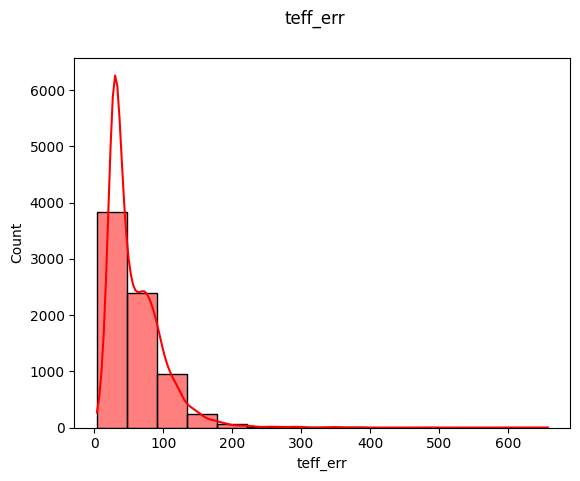

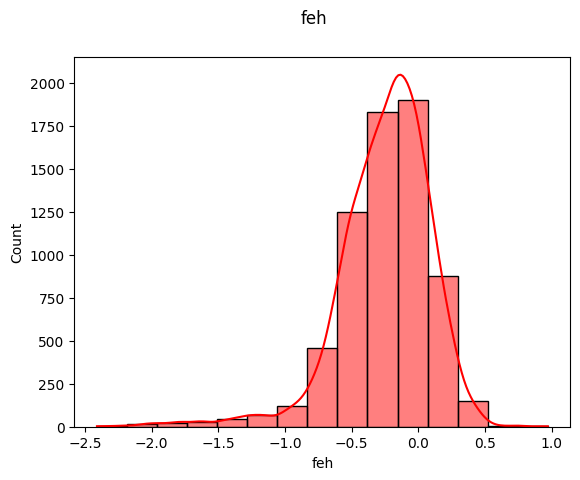

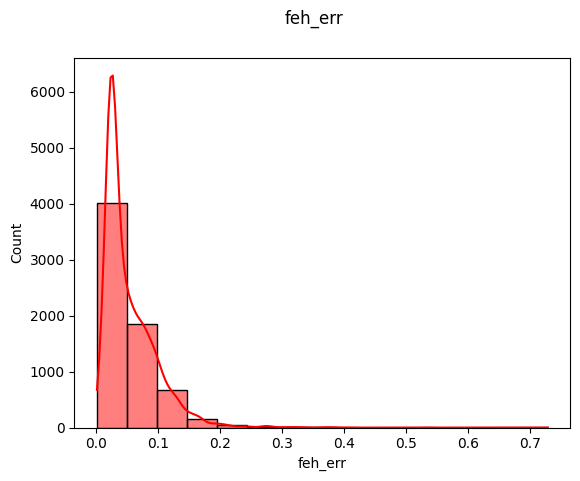

In [8]:
stars_numeric = stars.select_dtypes(include=["float64"])

for col in stars_numeric.columns:
    sns.histplot(stars_numeric[col], kde=True, bins=15, color="red")
    plt.suptitle(col)
    plt.show()

If the histogram similar to  bell-shape, then the distribution is assumed to be normal. 
Columns z and rv have gaussian distribution. 
 


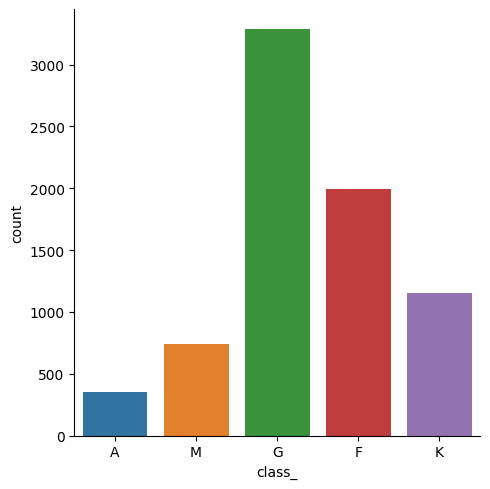

In [9]:
sns.catplot(x="class_", data=stars, kind="count")
sns.set_palette("GnBu")
plt.show()

For the categorical distribution(column subclass), categhory "G" has the highest count, and "A" has the lowest. G is the mode. 

### 7) Quantile-Quantile plots (15p)
* Create an array called "s1" filled with random numbers sampled from the standard normal distribution. $(\mu = 0,\ \ \sigma = 1)$ 
<br>Then sort this array in an ascending order. Make sure the array has length equal to the number of non NA observations in the data.

* Next, create a similar array called "s2", but this time sample from the rayleigh distribution. $(\sigma = 1)$

* Assemble 2 scatter plots with s1 and s2 in the x axes and the **sorted** versions of a gaussian-like variable and a right-skewed variable in the y axes respectively.<br>Are they similar to the Q-Q plots of those variables generated by existing functions? Explain how the similarities came about, as well as any differences.

**Note: Drop NA's for plotting purposes as sorting arrays with NA's can cause issues.**

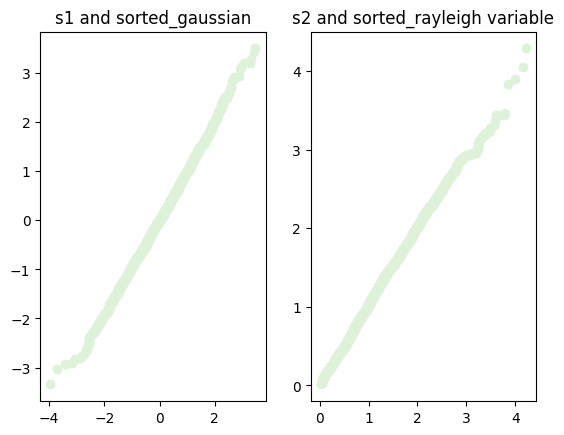

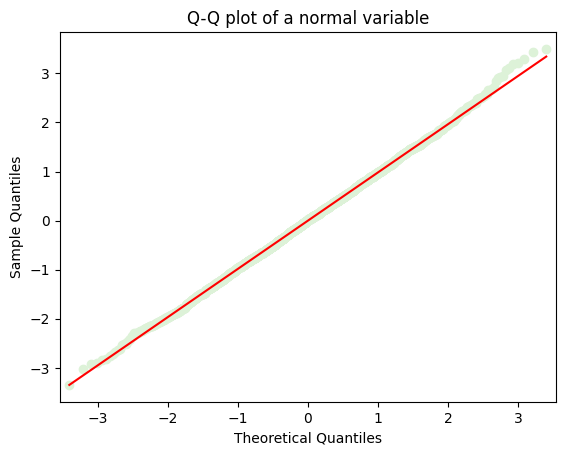

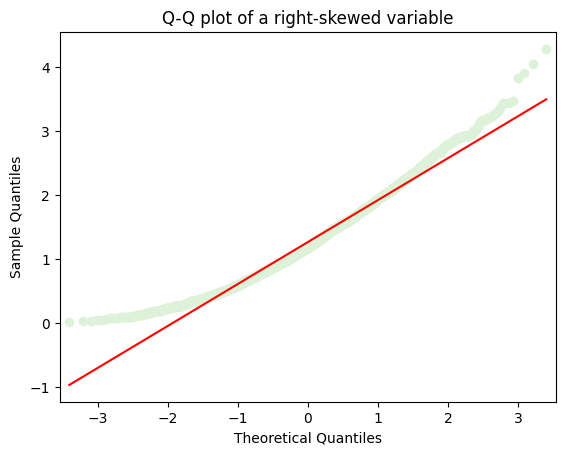

In [10]:
stars_new = stars.dropna()
s1 = np.array(np.random.normal(0, 1, size=len(stars_new)))
s1 = np.sort(s1)
s2=np.array(np.random.rayleigh(1, size=len(stars_new)))
s2= np.sort(s2)
gaussian_like = np.array(np.random.normal(0, 1, size=(len(stars_new))))
sorted_gaussian = np.sort(gaussian_like)
rayleigh_like = np.array(np.random.rayleigh(scale=1, size=(len(stars_new))))
sorted_rayleigh = np.sort(rayleigh_like)
#rayleigh distribution is already a right skewed distribution.

df=pd.DataFrame({"s1":s1, "s2":s2, "gaussian_sorted": sorted_gaussian, "gaussian": gaussian_like, "rayleigh_sorted":sorted_rayleigh, "rayleigh": rayleigh_like})

fig, ax=plt.subplots(1, 2)
ax[0].scatter(x="s1", y="gaussian_sorted", data=df)
ax[0].set_title("s1 and sorted_gaussian")
ax[1].scatter(x="s2", y="rayleigh_sorted", data=df)
ax[1].set_title("s2 and sorted_rayleigh variable")

a = sm.qqplot(gaussian_like, line="s")
plt.title("Q-Q plot of a normal variable")
b = sm.qqplot(rayleigh_like, line="s")
plt.title("Q-Q plot of a right-skewed variable")

plt.show()
  

s1 and sorted_gaussian scatter plot is very similar to Q-Q plot of a normal variable. Both have an almost straight 45-degree line. It is expected because a Q-Q plot shows two sets of quantiles, if the quantiles came from the same distribution, the points form a straight line. Since s1 and sorted-gaussian both have normal distribution, a 45-degree line is generated. 
However, s2 and sorted_rayleigh plot is different from Q-Q plot of a right-skewed variable. The difference is came from the fact that a Q-Q plot compares the quantiles of 2 series. Since s2 and sorted_rayleigh have the same distribution and both variables are sorted, a 45-degree line is occurred. On the other hand, a right-skewed variable Q-Q plot shows a comparison with the distribution of the sorted version of that variable. Since sorting a variable changes the quantiles, it is normal to have some deviations. 

### 8) Looking out for correlations and outliers (20p)

* Generate a correlation matrix of the data and comment on any significant correlations.

* Even after the data cleaning step, one variable has noticably more NaN values than the rest.<br>For this variable, devise a scheme to determine if this is in any way connected to "class" or "subclass".

* Determine the number of outlier cases for each variable. Based on your intuition, is it okay to remove rows with outliers, or NaN values?

<Axes: >

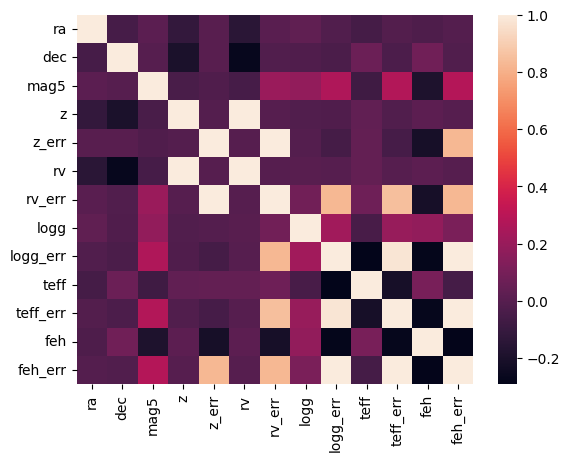

In [11]:

stars_corr = stars_numeric.corr()
sns.heatmap(stars_corr)


In the heatmap, the lighter the color the strong the linear relationship between columns.
Estimated redshift amount(z) and radial velocity(rv) have a strong linear relation.
z and rv_err also highly correlated since rv_err is a function of rv.
z_err is strongly correlated with feh_err.
rv_err is strongly correlated with logg_err, teff_err and feh_err.
logg_err is highly correlated with teff_err and feh_err.
teff_err is strongly correlated with feh_err.
They are all positively correlated meaning both variables move in the same direction.



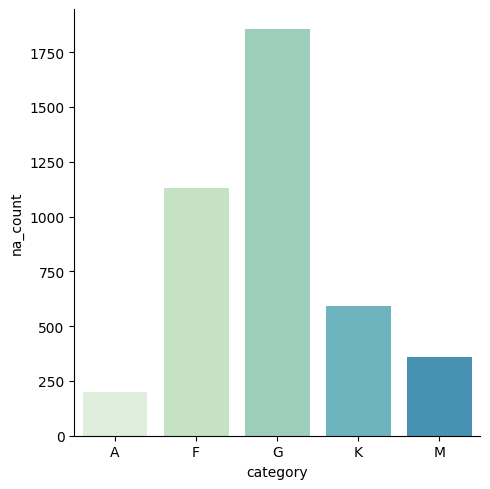

In [12]:

g = stars.groupby("class_")["mag5"].apply(lambda x: x.isna().sum())
na_counts = {'category': ['A', 'F', 'G', 'K', 'M'], 'na_count': [198, 1129, 1854, 592, 360]}
na_counts_df = pd.DataFrame(data=na_counts)
sns.catplot(data=na_counts_df, x="category", y="na_count", kind="bar")
plt.show()

> And also fill here

### 9) The spectral sequence (15p)

Use graphs (or `groupby`) to see if any of the calculated attributes (those with "_err" columns) can explain the star's class. (the column you created)<br>In other words, characterize each main star type using the calculated physical characteristics.

In [13]:

aggregate = stars.dropna().groupby("class_")["z_err", "rv_err", "logg_err", "teff_err", "feh_err"].agg( [min, max, np.mean, np.std])
print(aggregate)


           z_err                               rv_err                   \
             min       max      mean       std    min    max      mean   
class_                                                                   
A       0.000002  0.000064  0.000025  0.000011   0.74  19.27  7.400265   
F       0.000005  0.000070  0.000019  0.000008   1.37  20.86  5.686640   
G       0.000006  0.000097  0.000018  0.000007   1.76  29.15  5.438735   
K       0.000005  0.000085  0.000018  0.000006   1.39  25.42  5.249408   

                 logg_err                            teff_err          \
             std      min    max      mean       std      min     max   
class_                                                                  
A       3.376785    0.005  0.540  0.102603  0.090196     4.04  332.14   
F       2.531055    0.009  0.510  0.092363  0.072621     7.53  302.73   
G       2.209231    0.012  0.814  0.087231  0.062370    10.10  483.79   
K       1.888972    0.019  0.288  0.094434 

C:\Users\ipeks\AppData\Local\Temp\ipykernel_19944\3431702308.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aggregate = stars.dropna().groupby("class_")["z_err", "rv_err", "logg_err", "teff_err", "feh_err"].agg( [min, max, np.mean, np.std])


Class A:  has the lowest range of fractional change in wavelenght of the light emission amoung other groups, has the highest value on average for other variables.

Class G: has the highest records for all variables among other classes but the class has lower values on average which may indicate that the high records are outliers. 
